## HIERARCHICAL CLUSTERING

In [39]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def load_credit_card():
    data = pd.read_csv("CC GENERAL.csv")
    return data

data = load_credit_card()
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.901,0.818,95.400,0.000,95.400,0.000,0.167,0.000,0.083,0.000,0,2,1000.000,201.802,139.510,0.000,12
1,C10002,3202.467,0.909,0.000,0.000,0.000,6442.945,0.000,0.000,0.000,0.250,4,0,7000.000,4103.033,1072.340,0.222,12
2,C10003,2495.149,1.000,773.170,773.170,0.000,0.000,1.000,1.000,0.000,0.000,0,12,7500.000,622.067,627.285,0.000,12
3,C10004,1666.671,0.636,1499.000,1499.000,0.000,205.788,0.083,0.083,0.000,0.083,1,1,7500.000,0.000,nan,0.000,12
4,C10005,817.714,1.000,16.000,16.000,0.000,0.000,0.083,0.083,0.000,0.000,0,1,1200.000,678.335,244.791,0.000,12


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000,1564.475,2081.532,0.000,128.282,873.385,2054.140,19043.139
BALANCE_FREQUENCY,8950.000,0.877,0.237,0.000,0.889,1.000,1.000,1.000
PURCHASES,8950.000,1003.205,2136.635,0.000,39.635,361.280,1110.130,49039.570
ONEOFF_PURCHASES,8950.000,592.437,1659.888,0.000,0.000,38.000,577.405,40761.250
INSTALLMENTS_PURCHASES,8950.000,411.068,904.338,0.000,0.000,89.000,468.637,22500.000
CASH_ADVANCE,8950.000,978.871,2097.164,0.000,0.000,0.000,1113.821,47137.212
PURCHASES_FREQUENCY,8950.000,0.490,0.401,0.000,0.083,0.500,0.917,1.000
ONEOFF_PURCHASES_FREQUENCY,8950.000,0.202,0.298,0.000,0.000,0.083,0.300,1.000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000,0.364,0.397,0.000,0.000,0.167,0.750,1.000
CASH_ADVANCE_FREQUENCY,8950.000,0.135,0.200,0.000,0.000,0.000,0.222,1.500


### DATA PREPROCESSING - FEATURE ENGINEERING

In [41]:
#Count missing variable

data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [42]:
# Filling Missing Variable

data['MINIMUM_PAYMENTS'].fillna(data["PAYMENTS"], inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [43]:
# Feature Engineering

data["new_BALANCE_BALANCE_FREQUENCY"] = data["BALANCE"] * data["BALANCE_FREQUENCY"]
data["new_ONEOFF_PURCHASES_PURCHASES"] = data["ONEOFF_PURCHASES"] / data["PURCHASES"]
data["new_INSTALLMENTS_PURCHASES_PURCHASES"] = data["INSTALLMENTS_PURCHASES"] / data["PURCHASES"]
data["new_CASH_ADVANCE_PURCHASES_PURCHASES"] = data["CASH_ADVANCE"] * data["CASH_ADVANCE_FREQUENCY"]
data["new_PURCHASES_PURCHASES_FREQUENCY"] = data["PURCHASES"] * data["PURCHASES_FREQUENCY"]
data["new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY"] = data["PURCHASES"] * data["ONEOFF_PURCHASES_FREQUENCY"]
data["new_PURCHASES_PURCHASES_TRX"] = data["PURCHASES"] / data["PURCHASES_TRX"]
data["new_CASH_ADVANCE_CASH_ADVANCE_TRX"] = data["CASH_ADVANCE"] / data["CASH_ADVANCE_TRX"]
data["new_BALANCE_CREDIT_LIMIT"] = data["BALANCE"] / data["CREDIT_LIMIT"]
data["new_PAYMENTS_CREDIT_LIMIT"] = data["PAYMENTS"] / data["MINIMUM_PAYMENTS"]

In [44]:
#Checking missing variable

data.isnull().sum().sort_values(ascending=False).head()

new_CASH_ADVANCE_CASH_ADVANCE_TRX       4628
new_ONEOFF_PURCHASES_PURCHASES          2044
new_INSTALLMENTS_PURCHASES_PURCHASES    2042
new_PURCHASES_PURCHASES_TRX             2041
new_PAYMENTS_CREDIT_LIMIT                240
dtype: int64

In [45]:
data.fillna(0, inplace=True)

In [46]:
#Dropping CUST_ID feature

data.drop(['CUST_ID'], axis=1, inplace=True)

In [47]:
# Outlier Handling

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in data.columns:
    replace_with_thresholds(data, col)

In [48]:
# Min Max Scaling

names = data.columns
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(data)
data_scaled = pd.DataFrame(df, columns=names)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,new_BALANCE_BALANCE_FREQUENCY,new_ONEOFF_PURCHASES_PURCHASES,new_INSTALLMENTS_PURCHASES_PURCHASES,new_CASH_ADVANCE_PURCHASES_PURCHASES,new_PURCHASES_PURCHASES_FREQUENCY,new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY,new_PURCHASES_PURCHASES_TRX,new_CASH_ADVANCE_CASH_ADVANCE_TRX,new_BALANCE_CREDIT_LIMIT,new_PAYMENTS_CREDIT_LIMIT
0,0.002,0.818,0.004,0.000,0.010,0.000,0.167,0.000,0.083,0.000,...,0.002,0.000,0.400,0.000,0.001,0.000,0.024,0.000,0.015,0.012
1,0.168,0.909,0.000,0.000,0.000,0.269,0.000,0.000,0.000,0.167,...,0.153,0.000,0.000,0.116,0.000,0.000,0.000,0.337,0.173,0.031
2,0.131,1.000,0.034,0.046,0.000,0.000,1.000,1.000,0.000,0.000,...,0.131,0.554,0.000,0.000,0.037,0.044,0.033,0.000,0.126,0.008
3,0.088,0.636,0.067,0.090,0.000,0.009,0.083,0.083,0.000,0.056,...,0.056,0.554,0.000,0.001,0.006,0.007,0.762,0.043,0.084,0.000
4,0.043,1.000,0.001,0.001,0.000,0.000,0.083,0.083,0.000,0.000,...,0.043,0.554,0.000,0.000,0.000,0.000,0.008,0.000,0.258,0.022


### HIERARCHICAL CLUSTERING

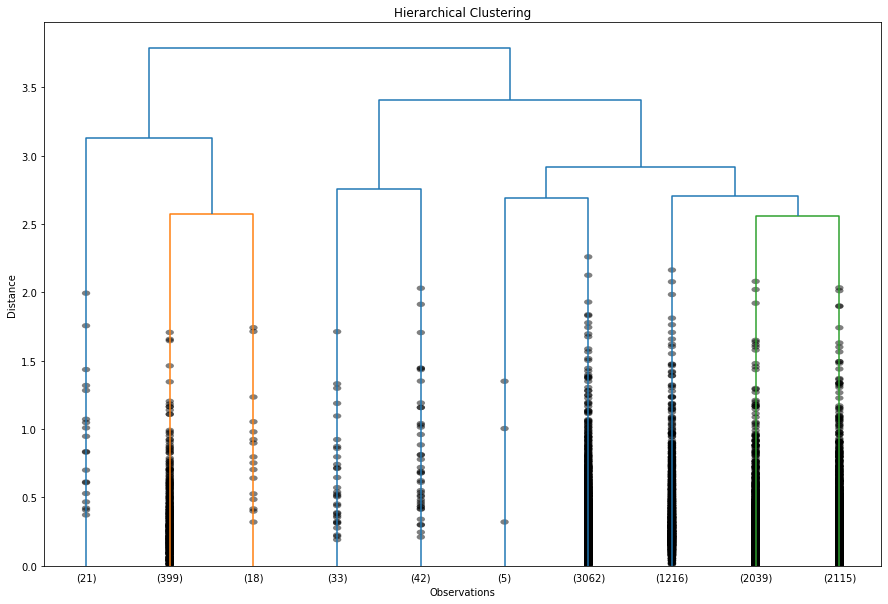

In [49]:
# Complete linkage method
hc_complete = linkage(data_scaled, "complete")

plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

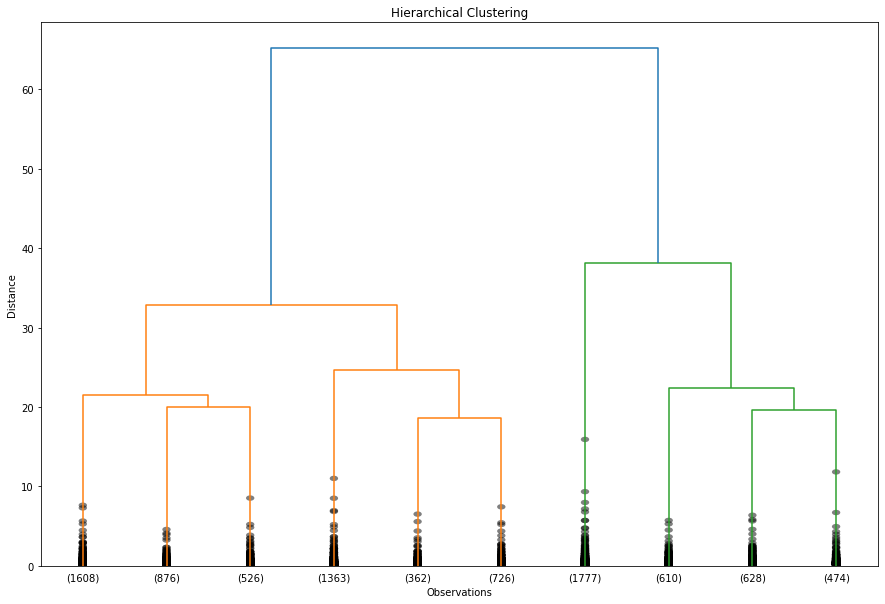

In [50]:
# Ward linkage method

hc_ward = linkage(data_scaled, "ward")

plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(data_scaled)
clusters

array([0, 3, 1, ..., 2, 3, 3], dtype=int64)

In [53]:
data = load_credit_card()

pd.DataFrame({"Customers": data['CUST_ID'], "Clusters": clusters})

data["cluster_no"] = clusters
data["cluster_no"] = data["cluster_no"] + 1

In [54]:
data.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
1,2451
2,1712
3,1777
4,3010


In [55]:
data.groupby("cluster_no").agg(np.mean)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_no,,,,,,,,,,,,,,,,,
1,819.897,0.671,539.157,271.789,267.940,511.197,0.397,0.099,0.305,0.071,1.730,7.521,4134.674,1321.519,498.526,0.170,11.847
2,2021.160,0.981,3101.672,2246.840,854.998,698.134,0.884,0.717,0.530,0.094,2.450,41.256,6579.087,3244.168,815.053,0.236,11.926
3,1111.957,0.963,1000.204,137.331,863.336,511.459,0.936,0.073,0.885,0.071,1.608,21.359,3661.270,1247.616,1084.581,0.272,11.241
4,2178.176,0.936,189.297,181.240,8.116,1795.310,0.080,0.070,0.011,0.249,5.908,1.540,4093.475,1495.536,1044.730,0.024,11.180
